In [1]:
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,scipy,pandas,matplotlib,seaborn,sklearn,pywt 

CPython 3.5.2
IPython 5.1.0

numpy 1.11.1
scipy 0.18.0
pandas 0.18.1
matplotlib 1.5.1
seaborn 0.7.1
sklearn 0.19.dev0
pywt 0.4.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)
system     : Darwin
release    : 16.0.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from collections import Counter
#save plot display settings to change back to when done plotting with seaborn
inline_rc = dict(mpl.rcParams)

from pandas import set_option
set_option("display.max_rows", 20)
pd.options.mode.chained_assignment = None

In [3]:
dataset_training = pd.read_pickle('data/Dataset_all_training.pkl')
# dataset_training.replace(to_replace=-99999, value=np.nan, inplace=True)

dataset_training.describe()

,Count_Fault_Crossing,Dist_2_CDI,distance_to_Fault_Network,Distance_to_AuGt150,Distance_to_CuGt2000,Distance_to_high_curvature_along_faults,GRAV_effective_density,Gravity_1VD,Gravity_Analytic_Signal,Kpct,PseudoLitho,RockCode,Thppm,TMI_1VD,TMI_Analytic_Signal,TMI_effective_susc,U_div_Th,Uppm,Outcome,class
count,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000,748856.000000
mean,0.060804,2340.536986,3375.910952,7863.664750,3970.545994,4926.313706,-0.076733,-7.211228,-7.209100,1.979132,6.536771,7.915371,26.752967,0.005754,0.780903,0.075429,0.165614,3.638915,0.055907,0.003272
std,0.076219,2396.922399,3608.783990,5908.366423,3309.401231,4733.490670,0.137079,849.137478,849.137496,1.174467,4.130024,3.390040,23.482837,0.894300,1.022955,0.058222,1.501321,2.358552,1.123281,0.057105
min,0.000000,0.000128,0.006518,125.035000,125.560000,9.895720,-0.369478,-99999.000000,-99999.000000,-0.299976,1.000000,1.000000,-1.283310,-10.802200,0.003949,-0.070242,-918.141000,-0.442142,0.000000,0.000000
25%,0.000000,505.764500,862.716250,2835.860000,1454.567500,1748.530000,-0.182438,-0.001312,0.001254,1.008980,2.000000,5.000000,12.653300,-0.291891,0.255740,0.028222,0.118626,2.070980,0.000000,0.000000
50%,0.028723,1537.370000,2188.450000,6393.605000,2834.870000,3507.245000,-0.081081,-0.000402,0.001731,1.820080,6.000000,7.000000,17.059600,-0.073387,0.477557,0.073202,0.152430,2.946285,0.000000,0.000000
75%,0.100000,3509.162500,4446.470000,12181.000000,5610.445000,6279.570000,0.017653,0.000613,0.002271,2.734492,7.000000,12.000000,30.416500,0.192651,0.912613,0.127128,0.193580,4.488950,0.000000,0.000000
max,0.569841,14583.900000,22446.700000,25069.800000,16842.500000,27137.600000,0.261280,0.005052,0.005255,8.227270,15.000000,13.000000,211.651000,23.341500,24.067600,0.332257,20.081400,35.072800,33.000000,1.000000


In [30]:
# x = dataset_training.drop(['Outcome','class'], axis=1).values
x = dataset_training.drop(['Outcome','class','Distance_to_AuGt150','Distance_to_CuGt2000'], axis=1).values
y = dataset_training[['Outcome','class']].values
y1 = y[:,1]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        x, y1, train_size=0.66, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(Counter(y_test).values())
print(Counter(y_train).values())

(494244, 16)
(494244,)
(254612, 16)
(254612,)
dict_values([253775, 837])
dict_values([492631, 1613])


In [6]:
min_labels = list(np.unique(y_test))
mineralization_labels = ['{:.0f}'.format(x) for x in min_labels]


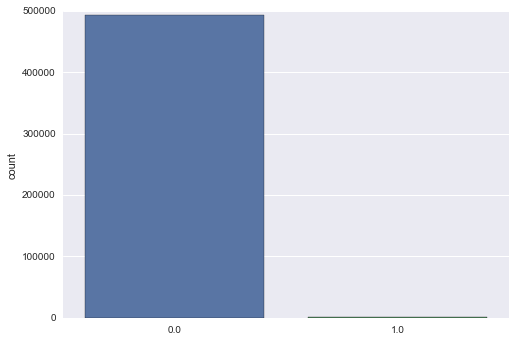

In [7]:
import seaborn as sns
sns.set()
sns.countplot(y_train)

In [32]:
# from http://stackoverflow.com/a/23479973

def balanced_subsample(x,y,subsample_size=1.0):

    class_xs = []
    min_elems = None

    for yi in np.unique(y):
        elems = x[(y == yi)]
        class_xs.append((yi, elems))
        if min_elems == None or elems.shape[0] < min_elems:
            min_elems = elems.shape[0]

    use_elems = min_elems
    if subsample_size < 1:
        use_elems = int(min_elems*subsample_size)

    xs = []
    ys = []

    for ci,this_xs in class_xs:
        if len(this_xs) > use_elems:
            np.random.shuffle(this_xs)

        x_ = this_xs[:use_elems]
        y_ = np.empty(use_elems)
        y_.fill(ci)

        xs.append(x_)
        ys.append(y_)

    xs = np.concatenate(xs)
    ys = np.concatenate(ys)

    return xs,ys

(3226, 16)
(3226,)


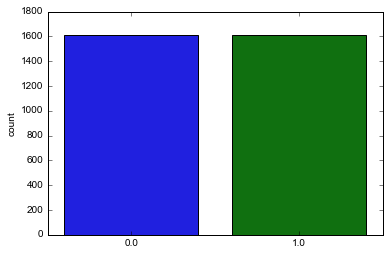

In [33]:
Xs_train,ys_train = balanced_subsample(X_train,y_train,subsample_size=1.0)

print(Xs_train.shape)
print(ys_train.shape)
sns.countplot(ys_train)

In [10]:
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from classification_utilities import display_cm

In [28]:
# classifiers = [
#     ensemble.RandomForestClassifier(n_estimators=100),
#     ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=30),
#     ensemble.AdaBoostClassifier()]
classifiers = [
    ensemble.RandomForestClassifier(n_estimators=100)]
classifiers = [
    ensemble.RandomForestClassifier(n_estimators=100)]

RandomForestClassifier
****Results****

Accuracy: 96.5689%
Precision: 8.7261%
Recall: 99.7611%
F1 score: 16.0484%

Classification report:

             precision    recall  f1-score   support

        0.0       1.00      0.97      0.98    253775
        1.0       0.09      1.00      0.16       837

avg / total       1.00      0.97      0.98    254612



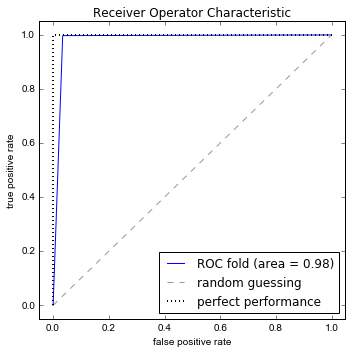

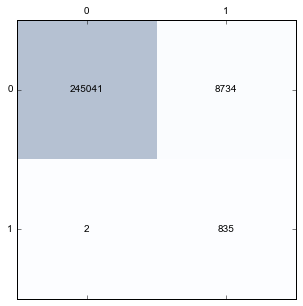

In [29]:
sns.reset_orig()
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Precision", "Recall", "F1-score"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    importances = clf.feature_importances_
#     std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    print("="*30)
    print(name)
    
    print('****Results****\n')
    test_predictions = clf.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.4%}".format(accuracy))
   

    precision = metrics.precision_score(y_test, test_predictions)
    print("Precision: {:.4%}".format(precision))
    
    recall = metrics.recall_score(y_test, test_predictions)
    print("Recall: {:.4%}".format(recall))
    
    f1 = metrics.f1_score(y_test, test_predictions)
    print("F1 score: {:.4%}\n".format(f1))
    
    print('Classification report:\n')
    print(classification_report(y_test, test_predictions))
    
    confmat = confusion_matrix(y_true=y_test, y_pred=test_predictions)
    
    fig, ax = plt.subplots(figsize=(5, 5))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predictions,pos_label=1)
    
#     mean_tpr += interp(mean_fpr, fpr, tpr)
#     mean_tpr[0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             lw=1,
             label='ROC fold (area = %0.2f)'
                   % (roc_auc))
    
    plt.plot([0, 1],
             [0, 1],
             linestyle='--',
             color=(0.6, 0.6, 0.6),
             label='random guessing')

#     mean_tpr /= len(cv)
#     mean_tpr[-1] = 1.0
#     mean_auc = auc(mean_fpr, mean_tpr)
#     plt.plot(mean_fpr, mean_tpr, 'k--',
#              label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
    plt.plot([0, 0, 1],
             [0, 1, 1],
             lw=2,
             linestyle=':',
             color='black',
             label='perfect performance')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('Receiver Operator Characteristic')
    plt.legend(loc="lower right")

    plt.tight_layout()
    # plt.savefig('./figures/roc.png', dpi=300)
#     plt.show()

#     display_adj_cm(, , adjacent_facies,display_metrics=True, hide_zeros=True)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

#     display_cm(confmat, mineralization_labels, display_metrics=True, hide_zeros=True)
#     # Plot normalized confusion matrix
#     plt.figure(figsize=(20,10))
#     plot_confusion_matrix(confmat, classes=mineralization_labels, normalize=True,
#                       title='Normalized confusion matrix')
    
    
#     plt.xlabel('predicted label')
#     plt.ylabel('true label')

#     plt.tight_layout()
#     plt.show()
    
#     plt.figure()
#     plt.title("Feature importances")
#     plt.bar(range(X_train.shape[1]), importances[indices],
#        color="r",  align="center")
#     plt.xticks(range(X_train.shape[1]), indices)
#     plt.xlim([-1, X_train.shape[1]])
#     plt.show()
       
    log_entry = pd.DataFrame([[name, accuracy*100, precision*100, recall*100, f1*100]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

In [ ]:
confmat

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confmat, annot=True)

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmat, classes=mineralization_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmat, classes=mineralization_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
print(confmat)

In [ ]:
confmat[0:16,0:16]

In [ ]:
display_cm(confmat[1:10,1:10], mineralization_labels[1:10], display_metrics=True, hide_zeros=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(confmat[17:34,17:34], cmap=plt.cm.Blues, alpha=0.3)
for i in range(17):
    for j in range(17):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
confmat.shape[0]

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predictions)

In [20]:
fpr

array([ 0.       ,  0.0347946,  1.       ])

In [21]:
tpr

array([ 0.        ,  0.99880526,  1.        ])

In [22]:
y_test

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [23]:
np.unique(y_test)

array([ 0.,  1.])

In [24]:
test_predictions

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [26]:
np.unique(test_predictions)

array([ 0.,  1.])